<img src = "./image/image.png" width=100% heigth=200px ><br>
# <center> Employee Attrition </center>

# Introduction<br>
Employee attrition is a critical aspect of human resource management, representing the departure of employees from an organization. Understanding and predicting attrition can aid in strategic workforce planning and retention efforts. This comprehensive documentation outlines the entire process of analyzing employee attrition using a dataset, encompassing data preprocessing, visualization, and the implementation of various machine learning models.

In [78]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler



In [79]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1500x900 with 0 Axes>

Reading Data

In [80]:
# Loading dataset
df = pd.read_csv('data.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Show data set information

In [81]:
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')

The dataset has 1470 rows for each employee and 35 attributes



## CLEANING DATA SET

Dropped columns with more than 90.0% empty values

In [82]:
# Assuming df is your DataFrame
threshold = 0.9  # Set the threshold for empty values (NaN)

# Calculate the threshold for number of non-NaN values
num_threshold = int((1 - threshold) * len(df))

# Drop columns with more NaN values than the threshold
df_cleaned = df.dropna(axis=1, thresh=num_threshold)

# Print the columns that were dropped
dropped_columns = set(df.columns) - set(df_cleaned.columns)
print(f"Dropped columns with more than {threshold * 100}% empty values: {dropped_columns}")

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", df_cleaned.shape)

# df_cleaned now contains the DataFrame with columns having less than the specified threshold of empty values


Dropped columns with more than 90.0% empty values: set()
Cleaned DataFrame shape: (1470, 35)


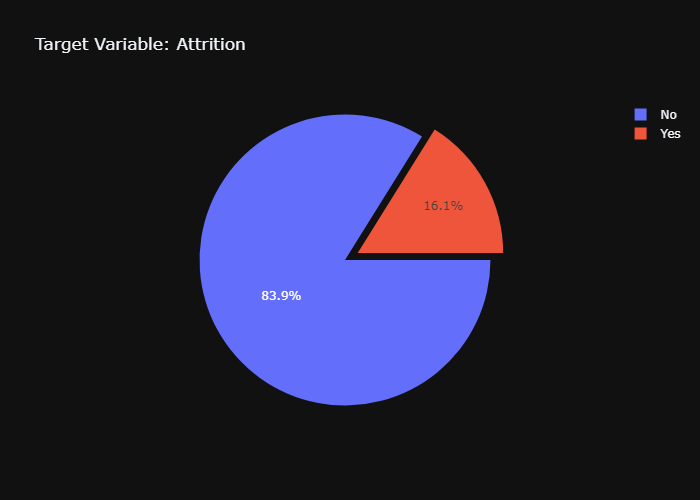

In [83]:
# Visualizing target variable classes and its distribution among the dataset
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent",)
fig.show('png')


## Feature selection<br>
Here we show some important data and get information about the our data set

In [84]:
Attrition = df.query("Attrition == 'Yes'")

In [85]:
#  function to plot histograms
def barplot(i):
    fig = px.histogram(Attrition, x = Attrition[i], template = 'plotly_dark',
                      title = f'{i} x Attrition', text_auto = 'd3-format')
    fig.show('png')

Below Down, We have added few Bar Graphs between Different Attributes 

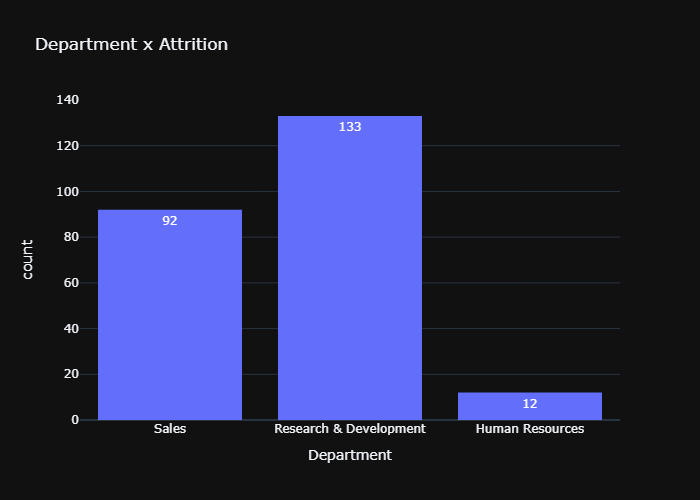

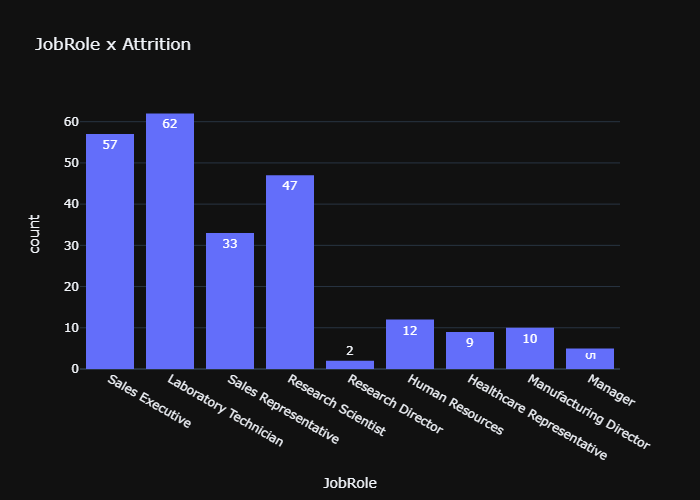

In [86]:
barplot('Department')
barplot('JobRole')

 **Most Employees who have left worked for the Research & Development Department**, with most of them being **Laboratory Technicians, Sales Executives and Research Scientists**.<br><br>



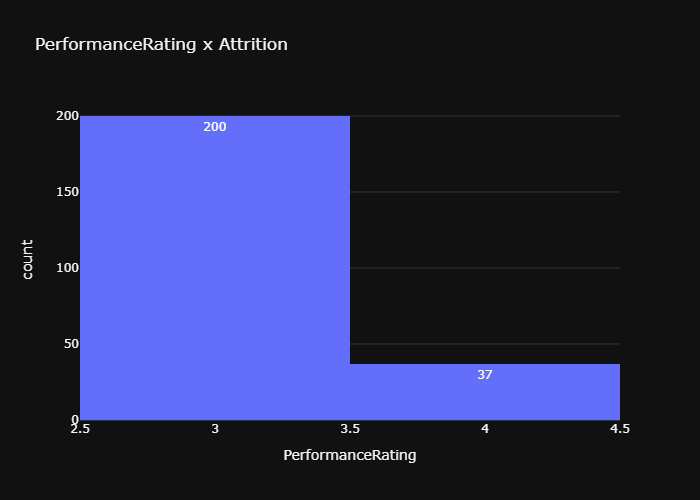

In [87]:
barplot('PerformanceRating')


It's Noticable that **These Employees Scored Excellent Performance Ratings**. It isn't Good to Lose Employees with such Performance Levels at all!<br><br>

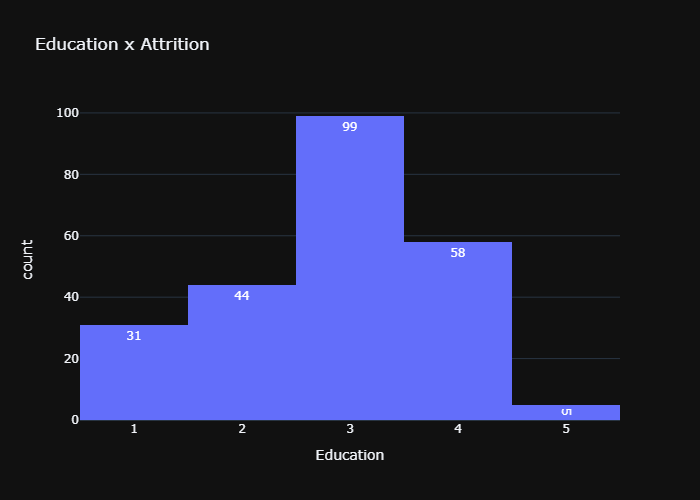

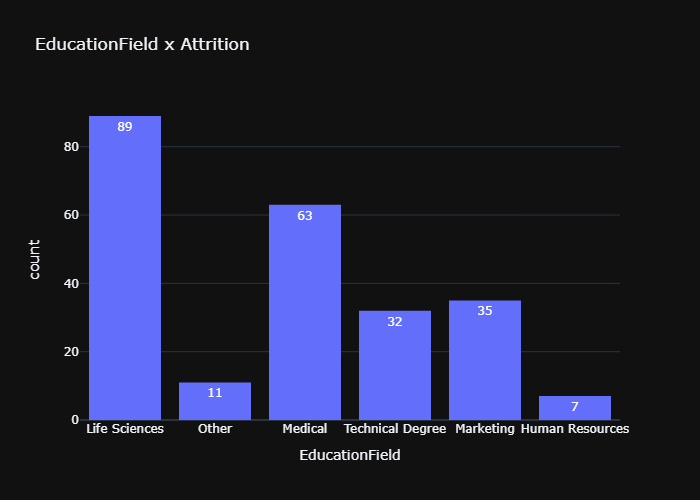

In [88]:
barplot('Education')
barplot('EducationField')


**Most of them had a Bachelor's degree** and their education field was mostly either **Life Sciences, Medical and Marketing**.<br><br>


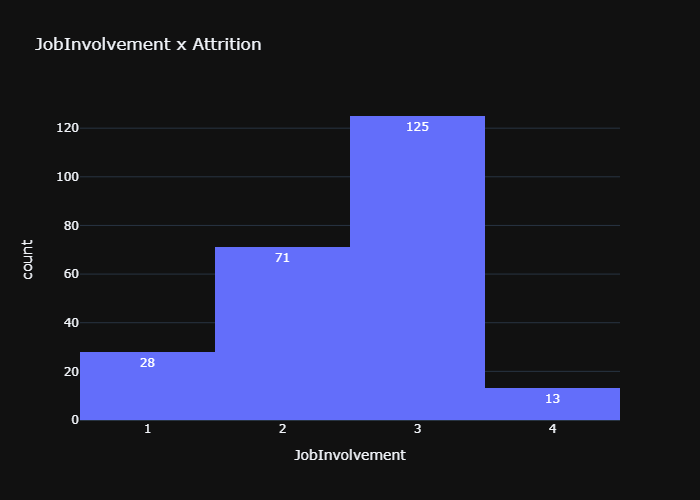

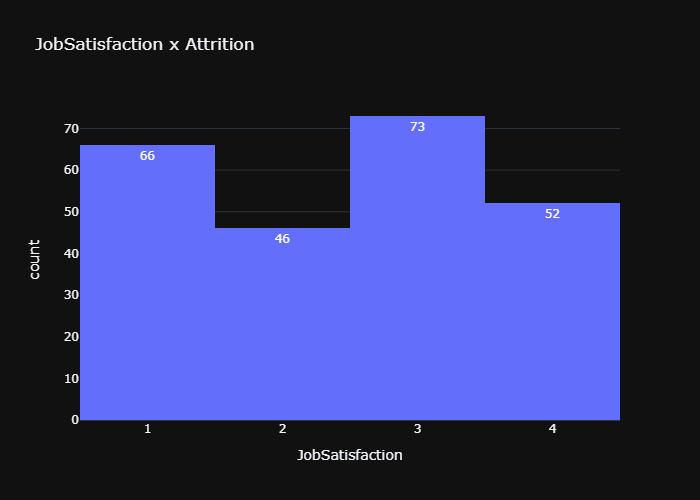

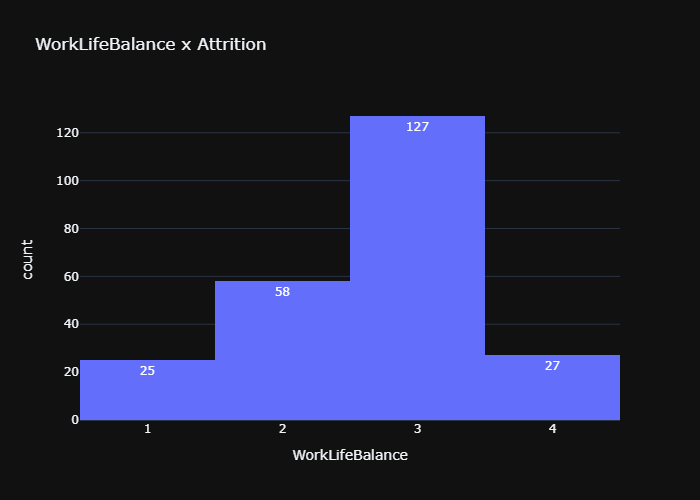

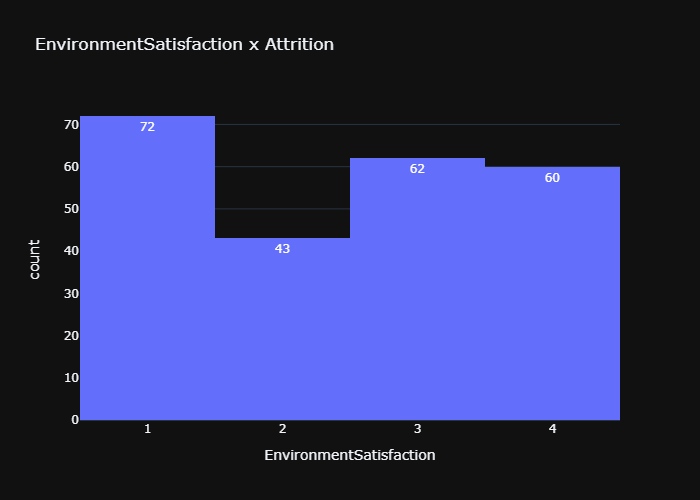

In [89]:
barplot('JobInvolvement')
barplot('JobSatisfaction')
barplot('WorkLifeBalance')
barplot('EnvironmentSatisfaction')



**The code analyzes employee data, indicating high job involvement, job satisfaction, and work-life balance. However, it reveals a concerning pattern: a significant number of employees report low satisfaction with the work environment.**.<br><br>



How can we make the work environment better? What kind of changes must be done, especially for the research and development personel? These are important questions to be asked.<br><br>

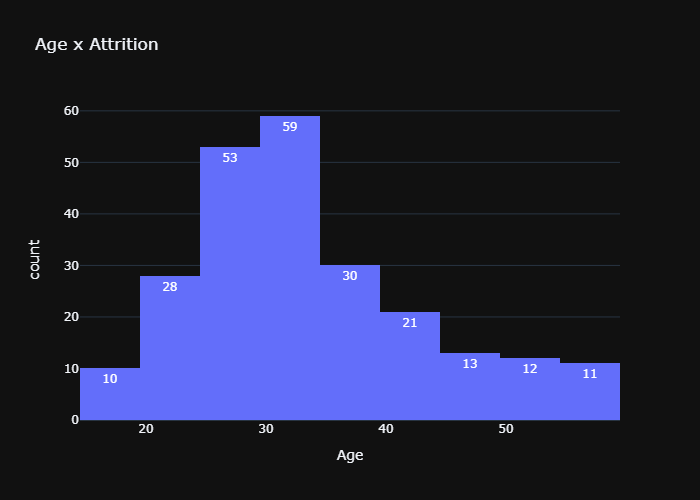

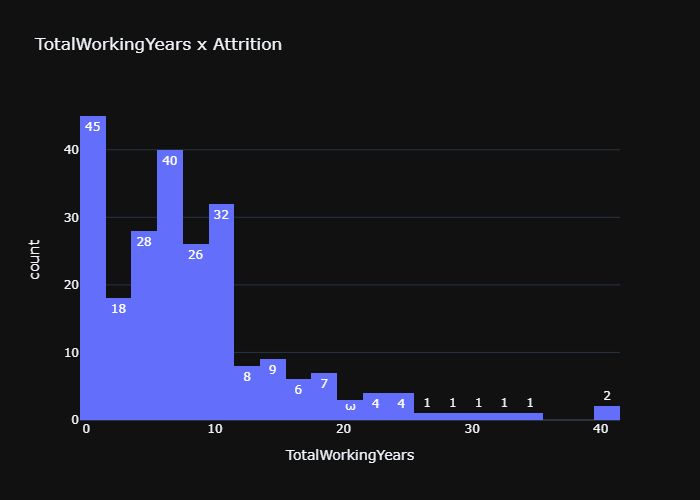

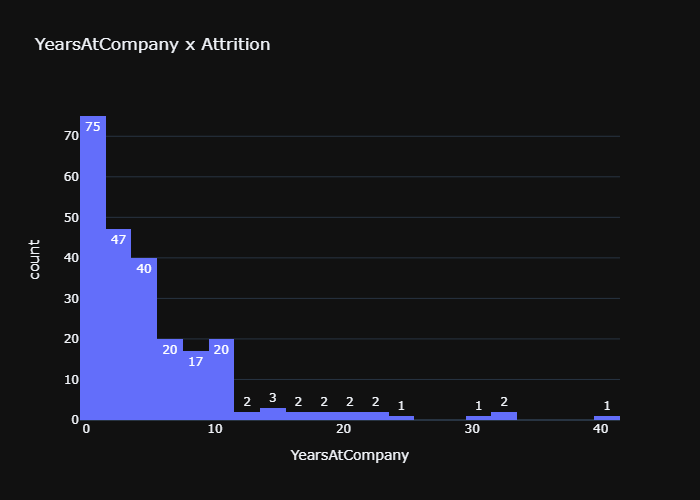

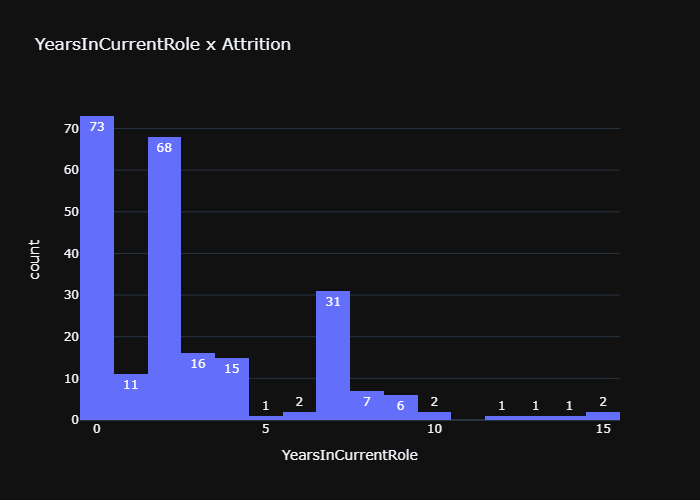

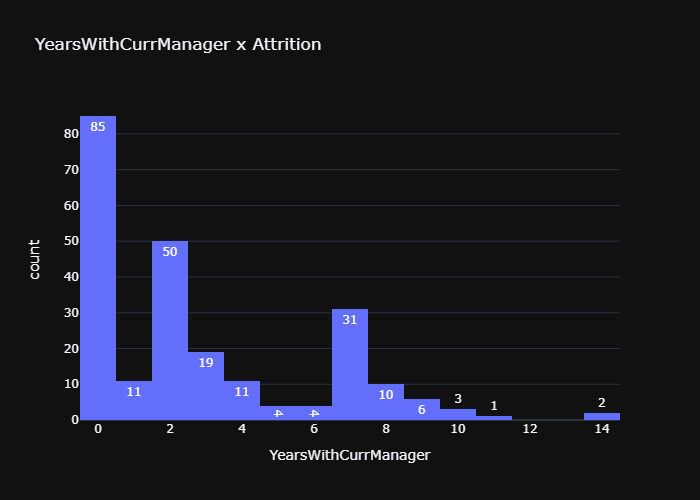

In [90]:
barplot('Age')
barplot('TotalWorkingYears')
barplot('YearsAtCompany')
barplot('YearsInCurrentRole')
barplot('YearsWithCurrManager')



The code analyzes employee attrition patterns, revealing that older employees are less likely to leave. Notably, employees aged 25-35 show higher attrition. Furthermore, the data indicates that longer tenures, both in terms of total working years and company tenure, correlate with lower attrition rates. Overall, the trend suggests that younger employees at an early career stage are more prone to leaving, particularly those with less than 10 years of cumulative work experience.

The code raises questions about employees with less than 2 years under their last manager, possibly indicating issues. It prompts an examination of manager training and company efforts to foster positive manager-team relationships, particularly in light of low satisfaction with the work environment.

Endocing the Labales
 
  
The code shows scikit-learn's `LabelEncoder` to transform categorical columns in a DataFrame (`df`) into numerical representations. It identifies the categorical columns using the `select_dtypes` method and then applies the label encoding using a lambda function, converting each categorical column to its corresponding numerical values. This preprocessing step is commonly used to prepare categorical data for machine learning models that require numerical input.

In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: encoder.fit_transform(col.astype(str)))

Find imporatnt feaures based on Correlation

 The code calculates the feature importance based on the sum of absolute correlations between each feature and all others in a DataFrame. It then visualizes the importance using a bar chart and a heatmap, showcasing the top N most important features. The heatmap provides a comprehensive view of the pairwise correlations among all features in the DataFrame.

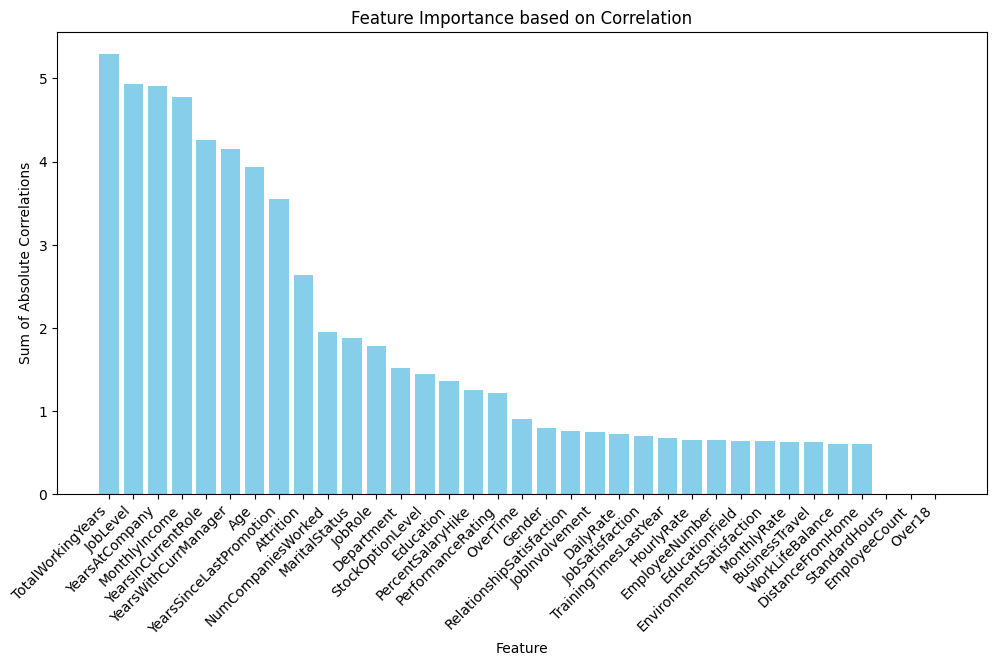

<Axes: >

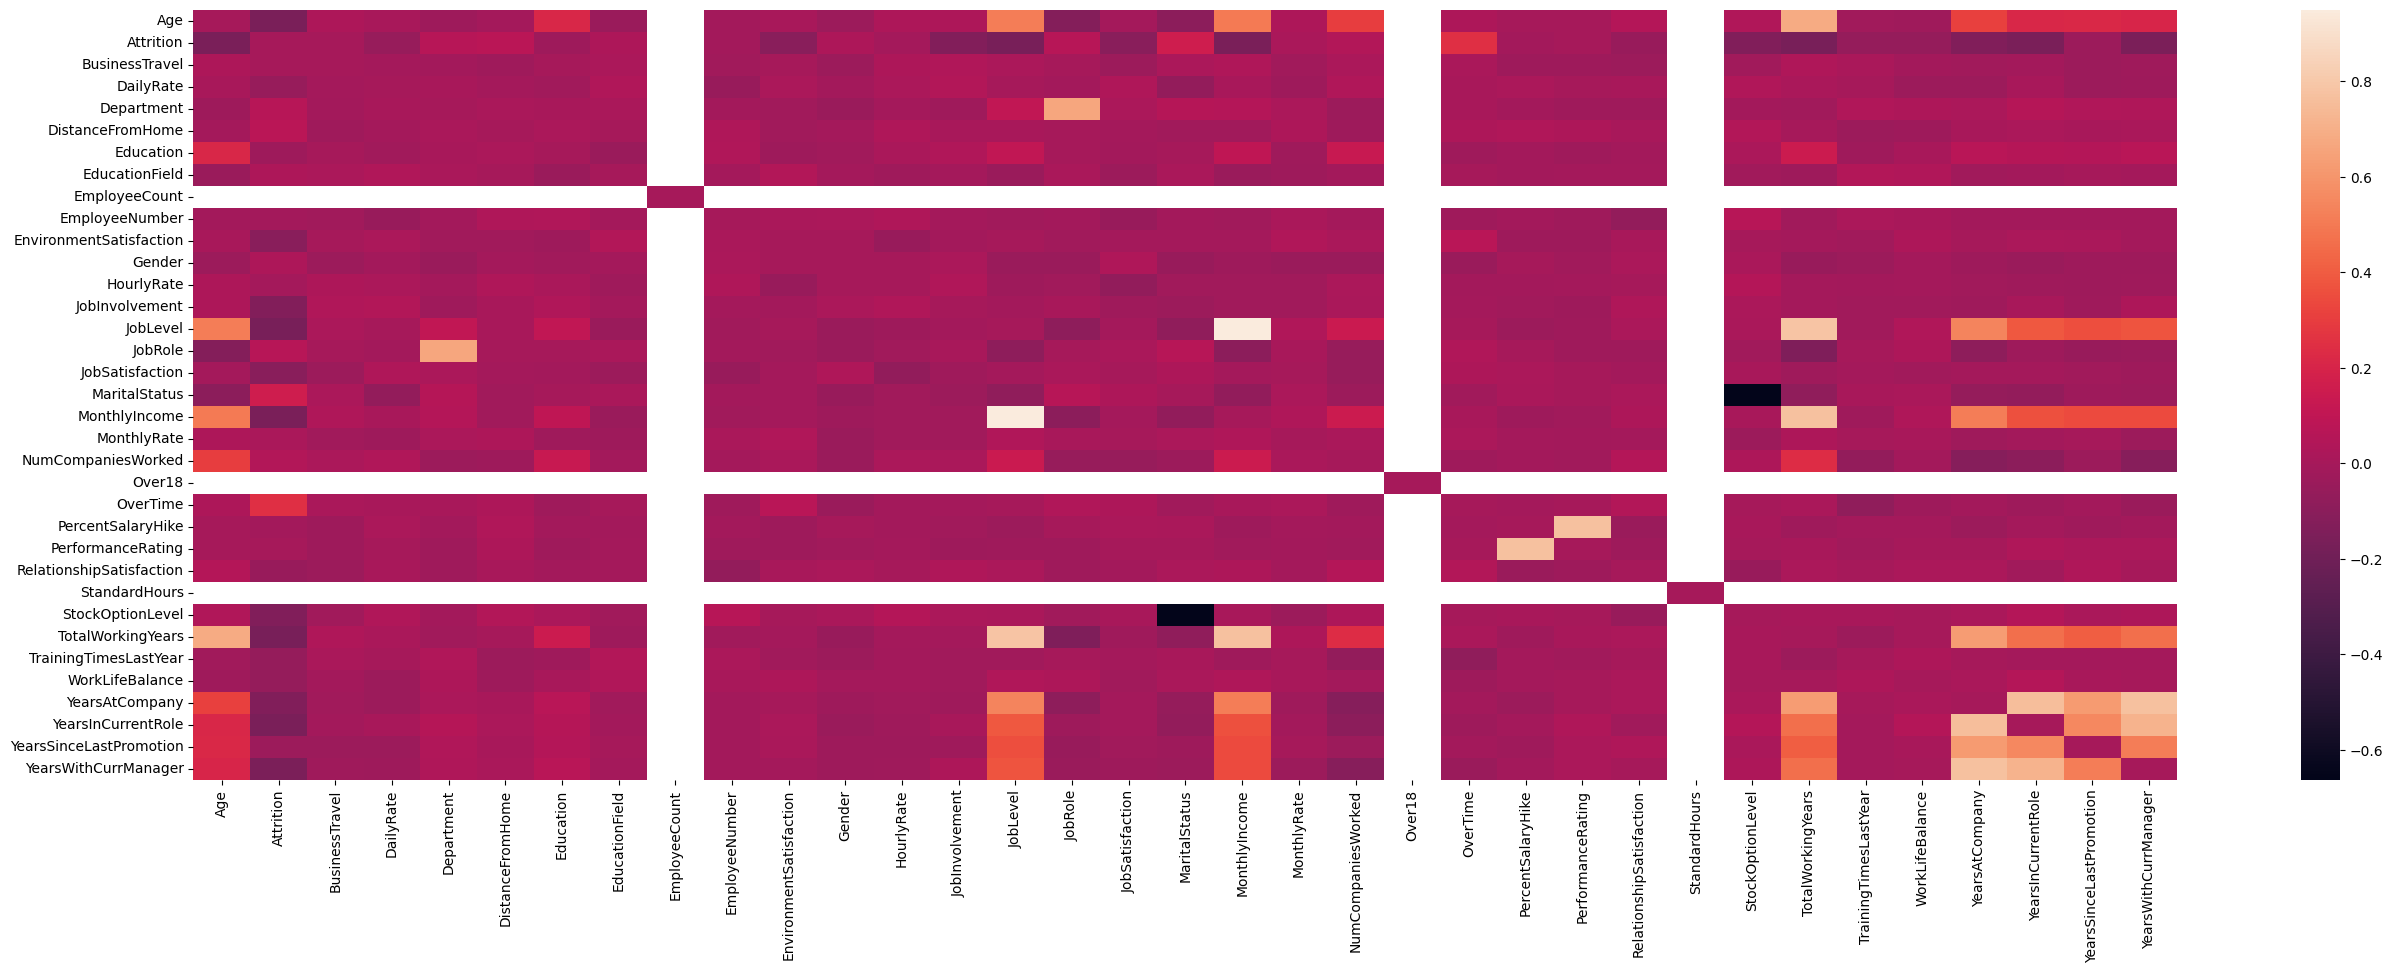

In [92]:
data_correlation = df.corr()

# Assuming df is your DataFrame with the data
data_correlation = df.corr()

# Exclude diagonal values
np.fill_diagonal(data_correlation.values, 0)

# Calculate the sum of absolute correlations for each feature
feature_importance = data_correlation.abs().sum(axis=0)

# Sort features based on importance
sorted_features = feature_importance.sort_values(ascending=False)

# Visualization
plt.rcParams["figure.figsize"] = [12, 6]
plt.bar(sorted_features.index, sorted_features.values, color='skyblue')
plt.title('Feature Importance based on Correlation')
plt.xlabel('Feature')
plt.ylabel('Sum of Absolute Correlations')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the top N most important features
top_n = 10
top_features_correlation = np.array(sorted_features.head(top_n).index)

plt.rcParams["figure.figsize"] = [32,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)


<Axes: >

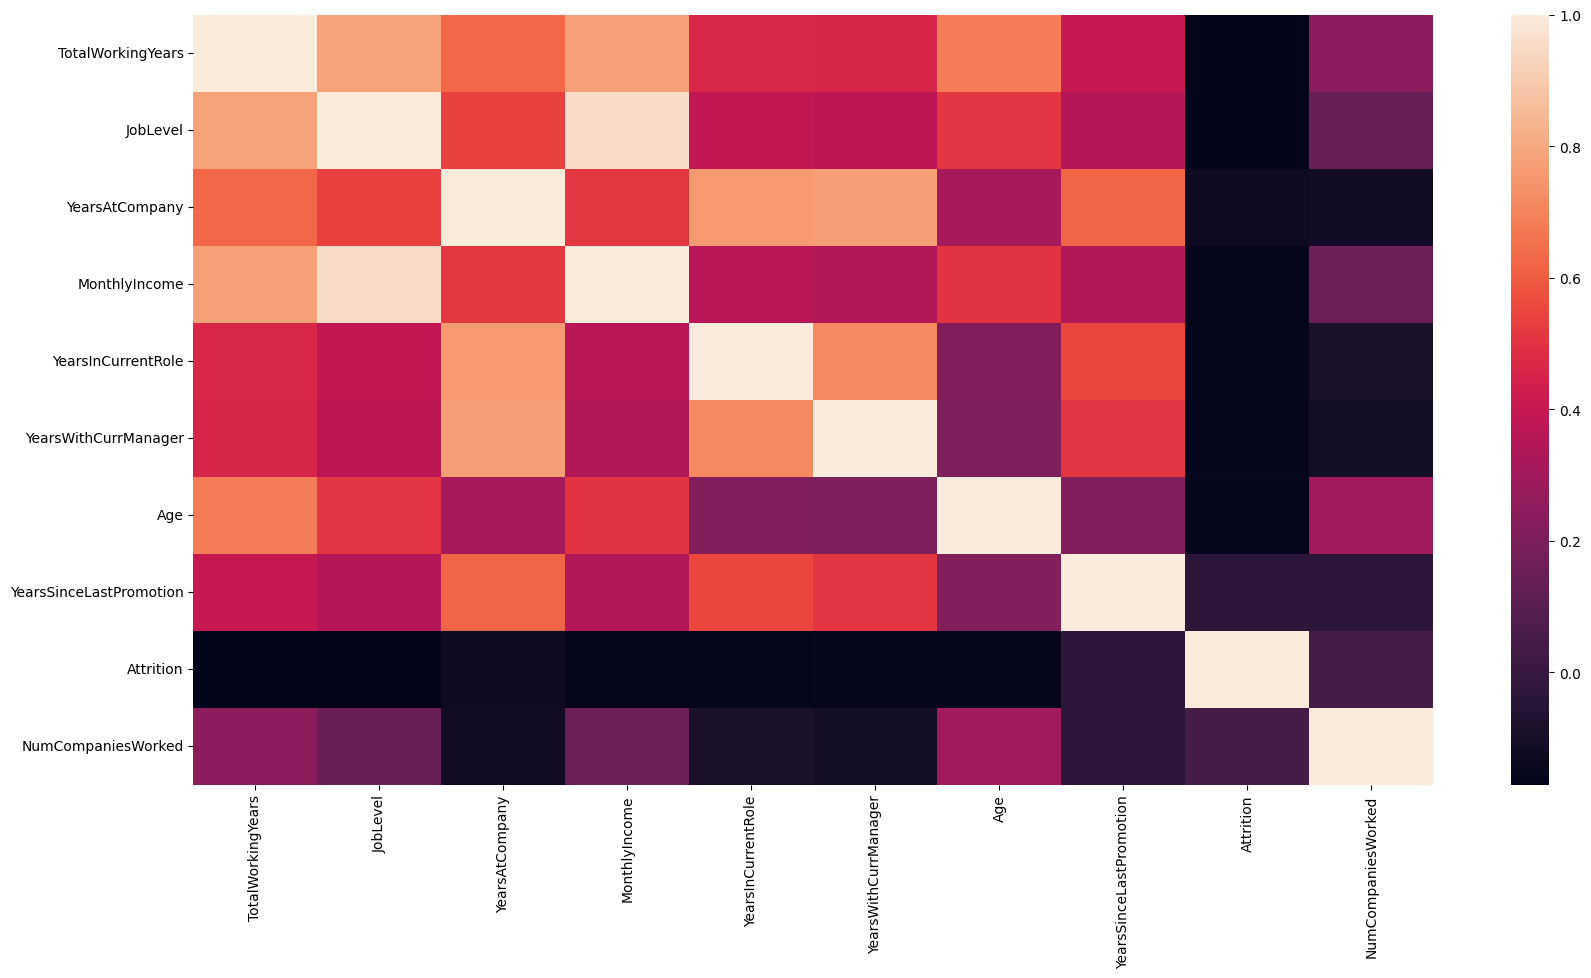

In [93]:
data_corr_filtered = df[top_features_correlation]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

Use Random Forest for Finding the Best Features


Here in the code we use a RandomForestClassifier from scikit-learn to identify and visualize the top N important features in a dataset for predicting attrition. It specifies the number of trees (n_estimators) and maximum depth for the model. The resulting bar chart displays the relative importance of each feature, helping to identify key factors contributing to attrition. The top N features are then stored in the `top_features_random_forest` list.

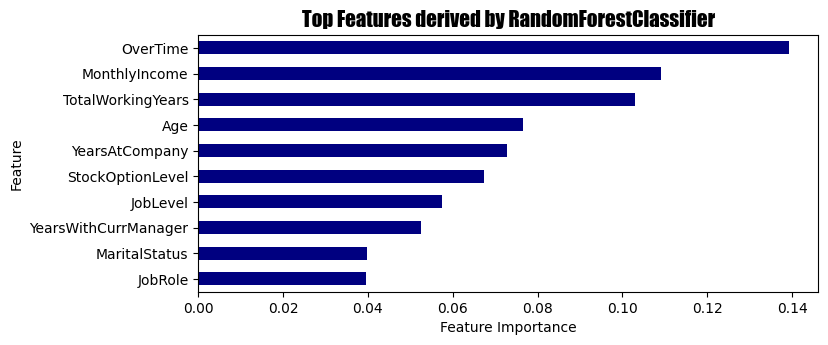

In [94]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']

# use RandomForestClassifier to look for important key features
n = 15  # specify n (top n features)
rfc = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)

# Get the top N most important features
top_n = 10
top_features_ = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(top_n)

# Display the top N most important features

# Plot the bar chart
plt.figure(figsize=[8, top_n/3])
top_features_.sort_values().plot(kind='barh', color='navy')
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

top_features_random_forest=top_features_.index.tolist()

Get the comment features in random forest method and Heatmap Method

In [95]:
comment_features = np.intersect1d(top_features_random_forest, top_features_correlation)
print(comment_features)

['Age' 'JobLevel' 'MonthlyIncome' 'TotalWorkingYears' 'YearsAtCompany'
 'YearsWithCurrManager']


## Trianing

In [96]:
# Splitting data into train and test sets
# Splitting Dataset
X = df.drop('Attrition', axis = 1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = comment_features
X_train[Scaling_Cols] = Scaler.fit_transform(X_train[Scaling_Cols])
X_test[Scaling_Cols] = Scaler.transform(X_test[Scaling_Cols])
X_train


X train size:  1029
X test size:  441
y train size:  1029
y test size:  441


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1124,0.500000,2,1462,2,6,3,3,1,1588,4,...,1,80,1,0.275,3,3,0.175,6,7,0.352941
1091,0.357143,2,575,1,25,3,1,1,1545,4,...,4,80,0,0.125,2,3,0.125,3,0,0.117647
950,0.309524,0,587,2,2,4,1,1,1324,4,...,1,80,1,0.250,5,2,0.250,8,9,0.352941
1031,0.666667,2,377,2,9,3,2,1,1457,1,...,1,80,1,0.700,1,4,0.175,7,4,0.176471
421,0.261905,2,408,1,25,5,5,1,565,3,...,2,80,0,0.150,2,4,0.050,2,1,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.571429,2,319,1,24,3,3,1,605,4,...,4,80,1,0.250,5,2,0.250,9,5,0.470588
203,0.523810,2,905,1,19,2,3,1,281,3,...,3,80,1,0.375,2,4,0.175,2,3,0.411765
1125,0.261905,1,995,1,2,1,1,1,1590,1,...,4,80,1,0.150,0,4,0.150,4,1,0.176471
406,0.809524,2,319,1,3,3,3,1,543,4,...,3,80,0,0.700,4,3,0.125,4,0,0.235294


In [97]:
def show_confu(y_test_pred, model):
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred) * 100))
    
    # Set zero_division=1 to avoid the warning and consider precision, recall, and F1 as 0 when no predicted samples.
    print('Precision: %.2f%%' % (precision_score(y_test, y_test_pred, zero_division=1) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_test_pred, zero_division=1) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_test_pred, zero_division=1) * 100))
    
    confusion_matrix_model = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

Decision Tree

Accuracy: 80.50%
Precision: 35.62%
Recall: 40.00%
F1_Score: 37.68%


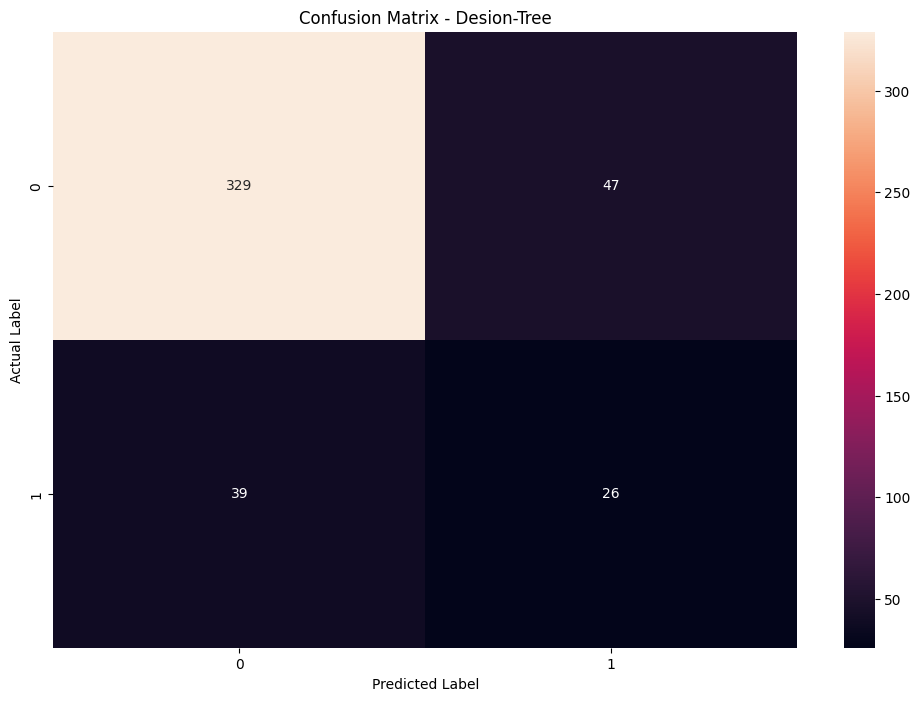

In [98]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the PCA-transformed features
tree_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_pred,'Desion-Tree')

KNN

Accuracy: 79.37%
Precision: 9.38%
Recall: 4.62%
F1_Score: 6.19%


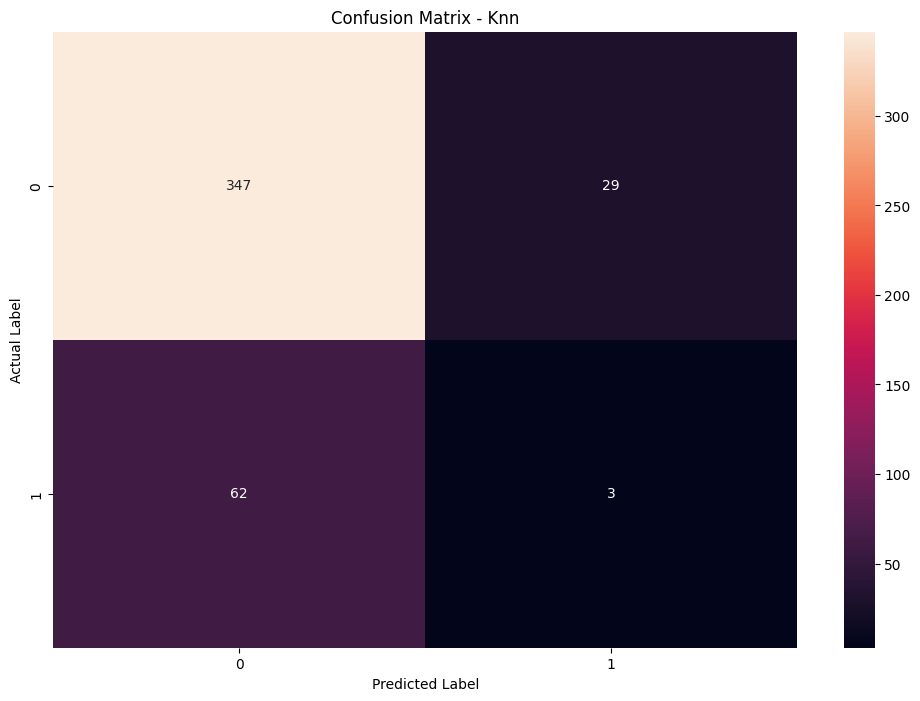

In [99]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the PCA-transformed features
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Knn')
